# Calculating Correlation Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

## 2. Create a Path to the File Using Pathlib.

In [2]:
# Set the file paths to the CSVs using the Path class from the pathlib library
msft_csv_path = Path("../Resources/MSFT.csv")
sp500_csv_path = Path("../Resources/SP500.csv")

## 3. Read the CSV into a Pandas DataFrame.

In [3]:
# Read the ice cream sales data, set the `date` as the index
msft_df = pd.read_csv(msft_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True)

sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


## 4. Combine the DataFrames

In [5]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined = pd.concat([msft_df, sp500_df], axis="columns", join="inner")
combined

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.680,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.800,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.290,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.370,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.260,40.26,39.8100,1911.910034
...,...,...,...,...,...,...
2019-05-13,123.35,33944920,124.110,125.55,123.0400,2811.870117
2019-05-14,124.73,25266320,123.870,125.88,123.7000,2834.409912
2019-05-15,126.02,24722710,124.260,126.71,123.7000,2850.959961


## 5. Drop Extra Columns

In [6]:
# Drop the extra columns from the DataFrame
combined.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
combined

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 6. Rename Columns

In [7]:
# Rename the columns by modifying the columns DataFrame attribute
combined.columns = ["MSFT", "SP500"]

combined

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 7. Plot the Price Trends

<AxesSubplot:xlabel='date'>

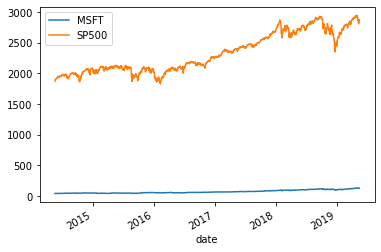

In [8]:
# Plot the data trends of the two variables over time
combined.plot()

## 8. Plot Price Relationships

<AxesSubplot:xlabel='MSFT', ylabel='SP500'>

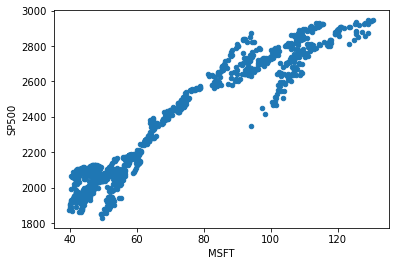

In [9]:
# Plot the relationship between the two variables
combined.plot(kind="scatter", x="MSFT", y="SP500")

## 9. Calculate Correlation of Prices

In [10]:
# Calculate the correlation of closing prices between MSFT and SP500
price_correlation = combined.corr()

## 10. Plot Correlation of Prices

<AxesSubplot:>

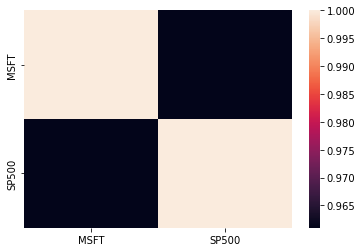

In [12]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation)


## 11. Calculate Daily Returns

In [13]:
# Use the `pct_change` function to calculate the daily returns for MSFT and SP500
daily_returns = combined.pct_change()
daily_returns

,MSFT,SP500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988
...,...,...
2019-05-13,-0.029733,-0.024131
2019-05-14,0.011188,0.008016
2019-05-15,0.010342,0.005839


## 12. Calculate Daily Return Trends

<AxesSubplot:xlabel='date'>

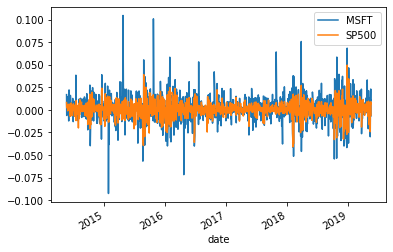

In [14]:
# Plot the daily returns of MSFT and SP500
daily_returns.plot()

## 13. Calculate Daily Return Relationships

<AxesSubplot:xlabel='MSFT', ylabel='SP500'>

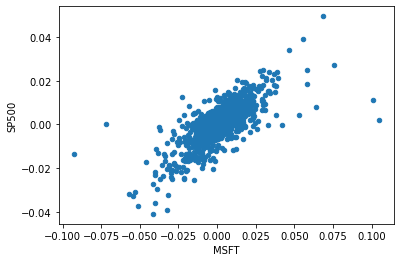

In [16]:
# Plot the relationship between the two variables
daily_returns.plot(kind='scatter', x="MSFT", y="SP500")

## 14. Calculate Correlation of Daily Returns

In [17]:
# Calculate the correlation between each column
daily_returns.corr()

,MSFT,SP500
MSFT,1.000000,0.739661
SP500,0.739661,1.000000


## 15. Plot Correlation of Daily Returns

<AxesSubplot:>

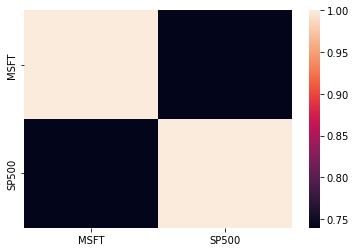

In [18]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(daily_returns.corr())